# Walmart - Confidence Interval and CLT


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Understanding the Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

In [3]:
#Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
#downloading dataset
!gdown 1GCF7-sBfqJKK2kjfJ3auYhTNNtRi7mlQ

Downloading...
From: https://drive.google.com/uc?id=1GCF7-sBfqJKK2kjfJ3auYhTNNtRi7mlQ
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 129MB/s]


In [ ]:
#Reading the data
df = pd.read_csv("walmart_data.csv")
df.head()

##Basic Analysis

In [ ]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [5]:
# Checking for null values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* No Null values

In [ ]:
# Checking the unique values in every column
df.nunique().sort_values(ascending=False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

* No Duplicates

In [ ]:
# Checking Datatypes of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


'User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status' have categorical values.So we need to change the datatype from int and object to category.

In [ ]:
col = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
df[col] = df[col].astype('category')

In [ ]:
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

* We can confirm the data types have changed.

In [ ]:
# Describing Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
# Describing Object and Category Datatypes Columns
df.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


Insights -
* There are 5891 unique users. User ID 1001680 has shopped the most frequent from Walmart.
* There are 3631 unique products. Product ID P00265242 is the most frequent sold item.
* Men are more frequent buyers than Females.
* There are 7 unique age categories. The most frequent buyers fall under the age group of 26-35.
* There are 3 different city categories. Most frequent buyers fal under category B.
* Most people are in the current city since 1 year.
* Most customerd are unmarried.

## Univariate Analysis

In [ ]:
# Count of unique User_ID
df['User_ID'].nunique()

5891

In [ ]:
# Count of unique Product_ID
df['Product_ID'].nunique()

3631

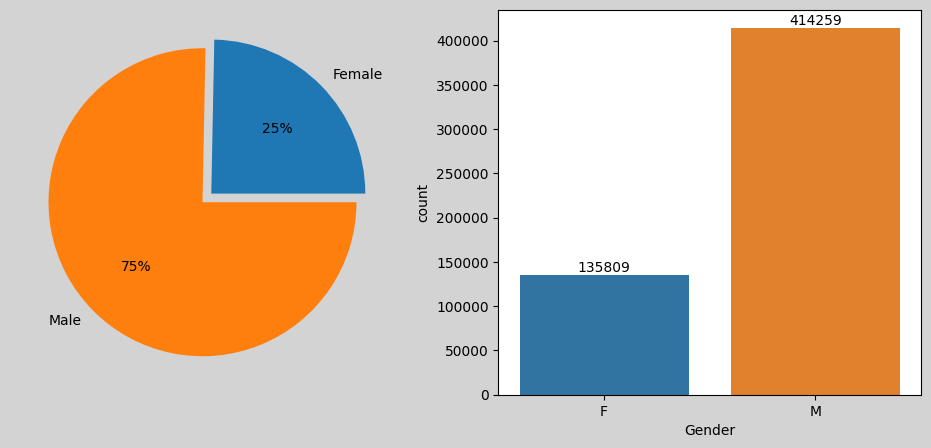

In [ ]:
# Count of Male and Female
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)

plt.show()

* Out of 0.54 million entries, 75% records are of men and 25% of women.

* Approximately there are 0.41 million records for men and 0.13 for Females.

In [ ]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

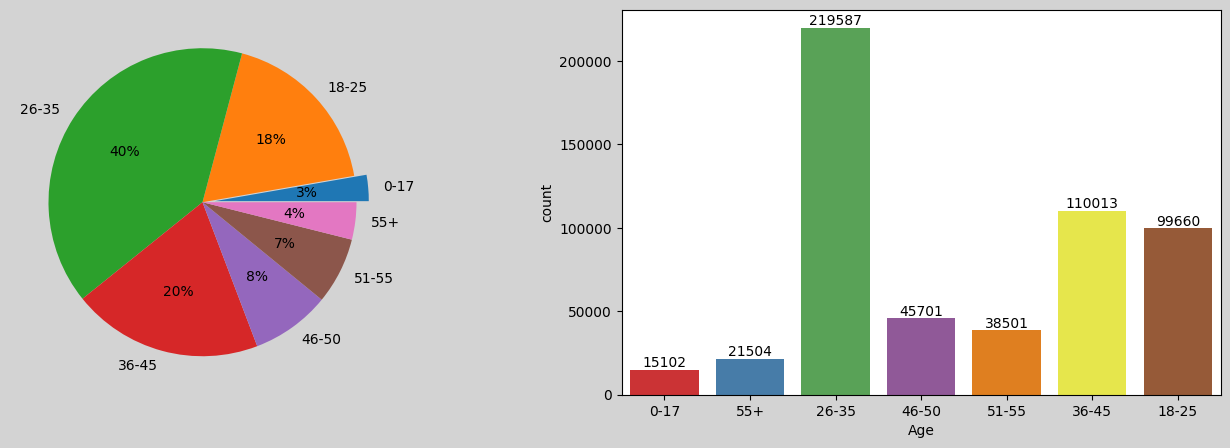

In [14]:
#
plt.figure(figsize = (17,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age', palette = "Set1")
for i in label.containers:
    label.bar_label(i)

plt.show()

* 40% of the buyers fall under the age group of 26-35 which is the highest amongst all age groups.

* Approximately 0.21 million records are present for age group 26-35 followed by 0.11 million records for group 36-45.

* Age group 0-17 and 55+ are the least frequent buyers which is only 3% and 4% of the data respectively.

* Approximately only 15k and 21k records are there for age group 0-17 and group 55+.

* We can observe that most buyers are in within the age of 18-45 before and after this range we can see less buyers.

In [ ]:
# Count of Unique City
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

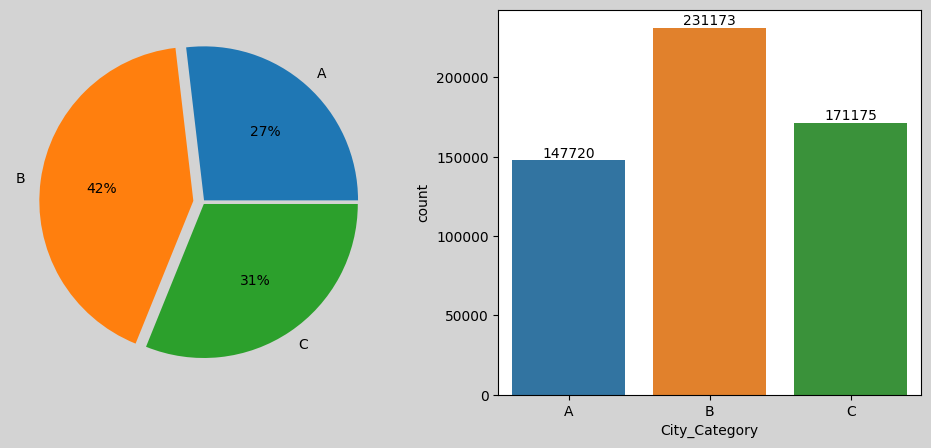

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)

plt.show()

* There are 42% buyers from City Category B, 31% from Category C and 27% from Category A

* Approximately 0.23 million records are present for Category B, 0.17 million for Category C and 0.14 million for category A.

In [ ]:
# Count for stay in current city
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

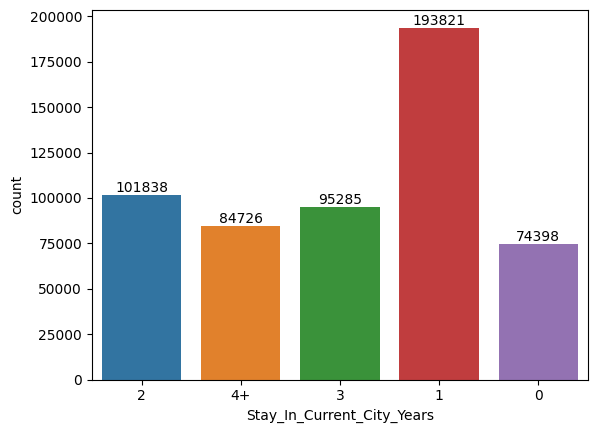

In [ ]:
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

* Most buyers are in their current cities since 1 year followed by 2 years and 3 years.

In [ ]:
# Count as per Marital Status
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

We can observe that in dataset for marital_status column there values 0 and 1.

0 means Unmarried and 1 means Married. So lets replace these values in the dataset.

In [ ]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

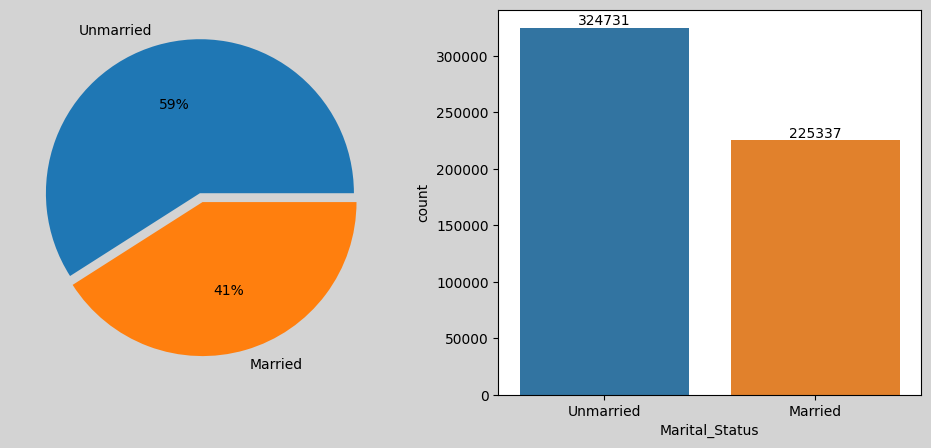

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['Unmarried','Married']
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = labels, explode = (0.06,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)

plt.show()

Insights -
* We can observe that 59% of the frequent buyers are of unmarried people, while 41% of married.
* There are an approximate of 0.32 million entries for unmarried people and 0.22 million for married people.


In [ ]:
# Analysing Spendings
round(df['Purchase'].describe(),2)

count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

Insights -
  While observing their spending habits of all buyers:

* The average order value is 9263.97
* While 50% of the buyers spend an approximate of 8047.
* The lowest order value is as low as 12.
* While, the highest order value is of 23961.

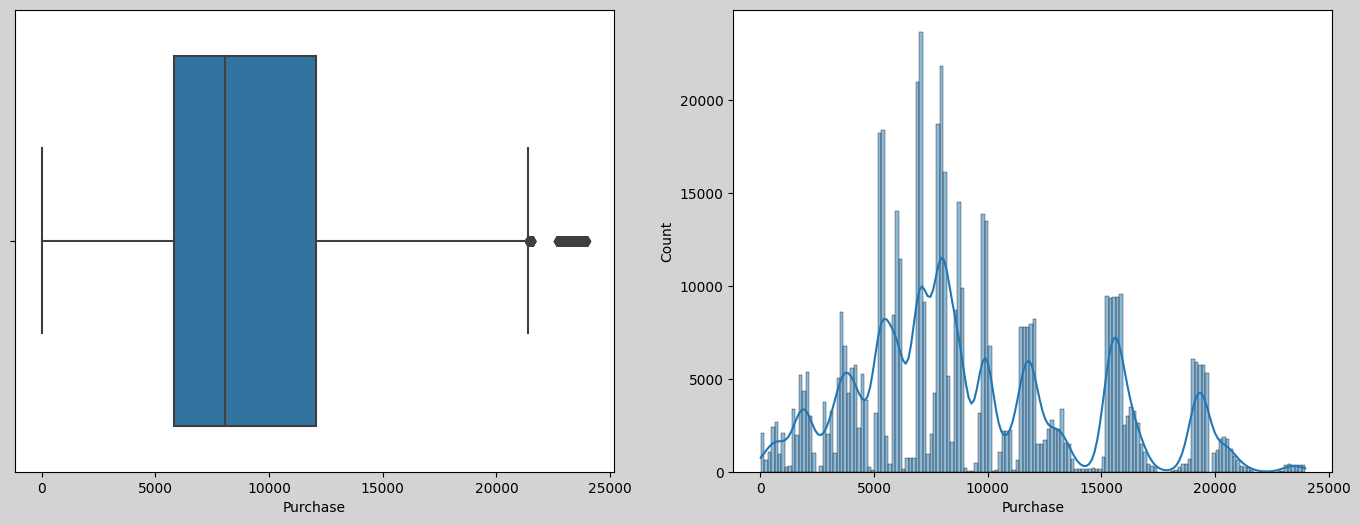

In [ ]:
# Purchase Distribution
plt.figure(figsize=(17, 6)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

Insights - While observing the purchase values of the orders we can infer that

* Most of the values lies between 6000 and 12000.
* Most order values lies in the range of 5000 - 10000
* There are more orders in the range 15000 - 16000 followed by 11000 - 11500 range and a few also in the 19000 - 20000 range.

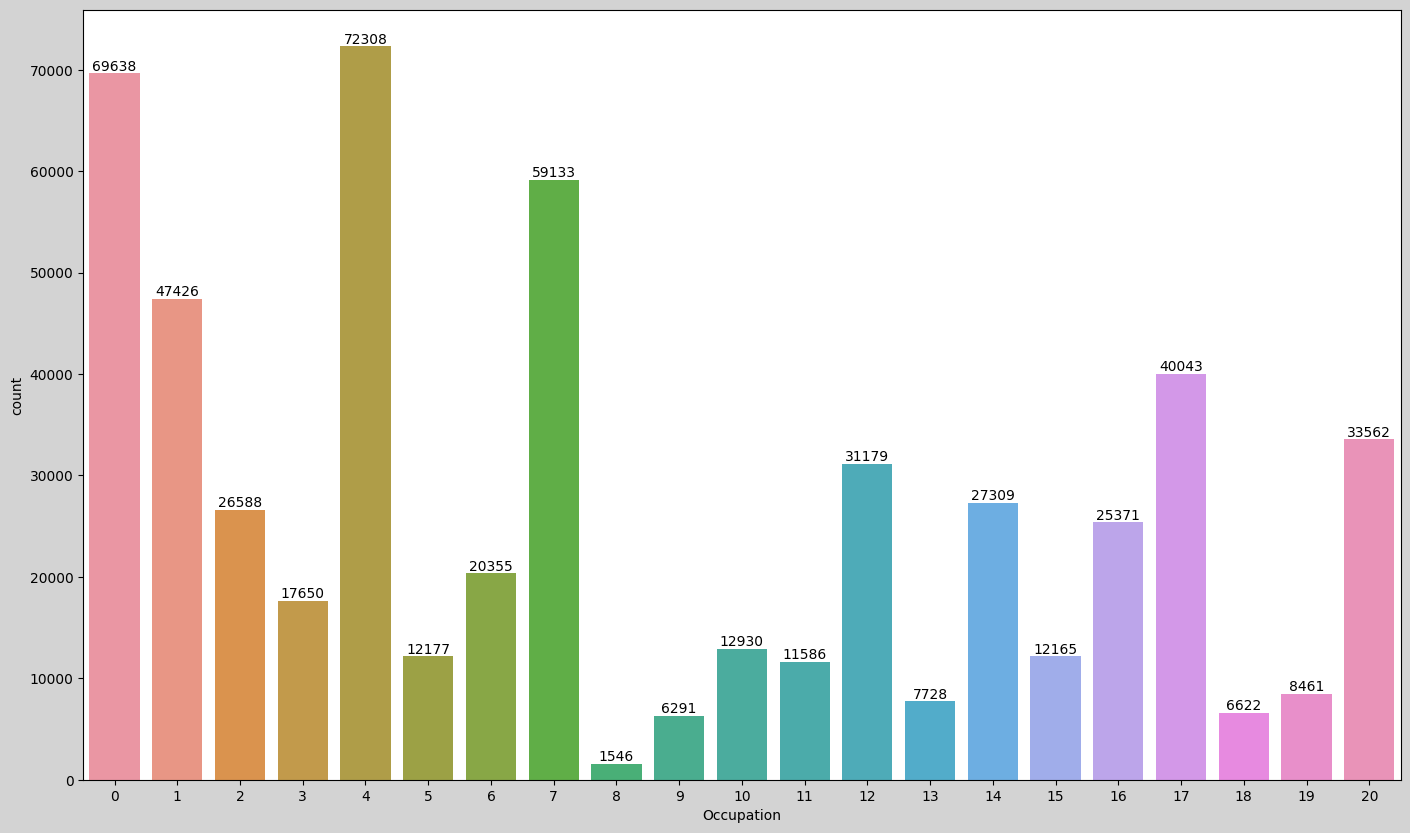

In [ ]:
# Occupation Distribution
plt.figure(figsize=(17, 10)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)

Insights -
* People having occupation 4 are the most frequent buyers followed by occupation 0 and 7.
* People having occupation 8 are the least frequent buyers followed by occupation 9 and 18.

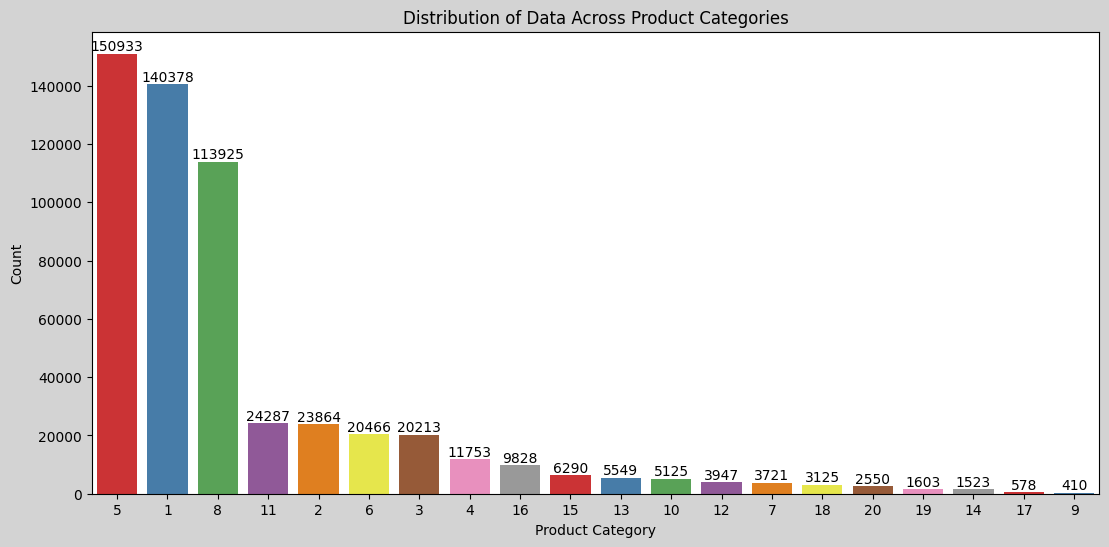

In [36]:
sorted_df = df['Product_Category'].value_counts().reset_index().rename(columns={'index': 'Product_Category', 'Product_Category': 'Count'})
sorted_df = sorted_df.sort_values(by='Count', ascending=False)

# Create the count plot with sorted categories
plt.figure(figsize=(13, 6)).set_facecolor("lightgrey")
label = sns.countplot(data=df, x='Product_Category', order=sorted_df['Product_Category'], palette='Set1')

# Set title and labels
label.set_title('Distribution of Data Across Product Categories')
label.set_xlabel('Product Category')
label.set_ylabel('Count')

for i in label.containers:
    label.bar_label(i)

plt.show()

Insights -
* The most frequent bought product category is 5 followed by 1 and 8.
* All the other categories are not much touched.
* The least frequent bought are category 9 followed by 17 and 14.

## Bi-Variate Analysis

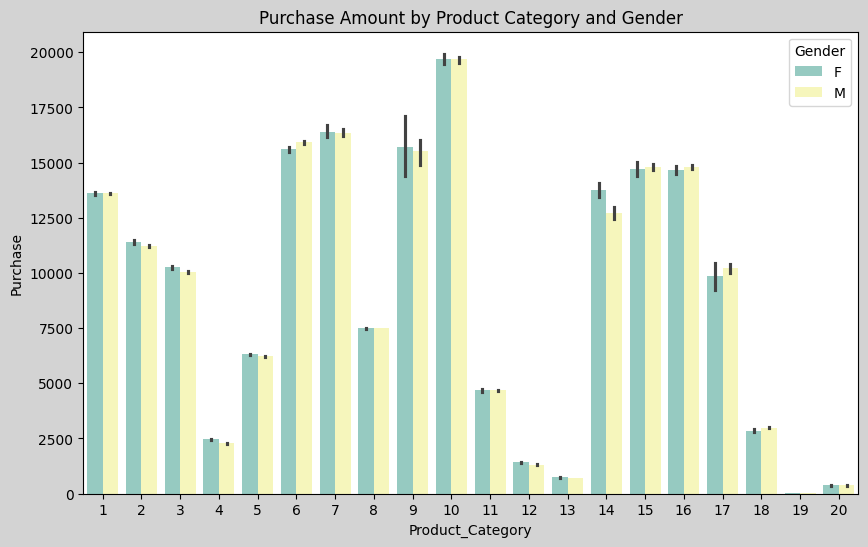

In [27]:
#Purchasing as per Product Category
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.barplot(y = df["Purchase"], x = df["Product_Category"], hue = df["Gender"], palette = 'Set3')
plt.title("Purchase Amount by Product Category and Gender")
plt.show()

In [23]:
# Male Spend Vs Female Spend
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


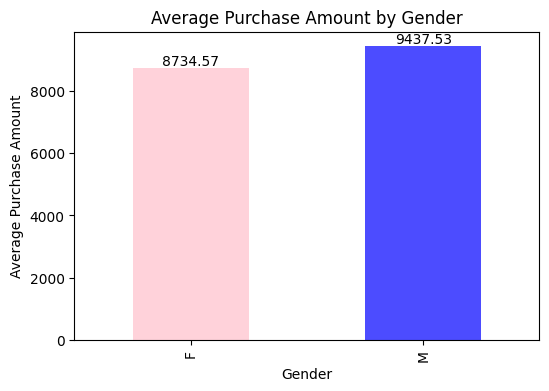

In [46]:
#Average Purchase amount by Gender
gender_purchase = df.groupby('Gender')['Purchase'].mean()


# Plotting
plt.figure(figsize=(6, 4))
label = gender_purchase.plot(kind='bar', color=['pink', 'blue'], alpha=0.7)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Gender')
for i in label.containers:
    label.bar_label(i)

# Show plot
plt.show()

Insights -
* The average order value for a male is 9437.
* While for a female it is 8734.
* Most of the purchases for men is around 8098 and for females it is around 7914.

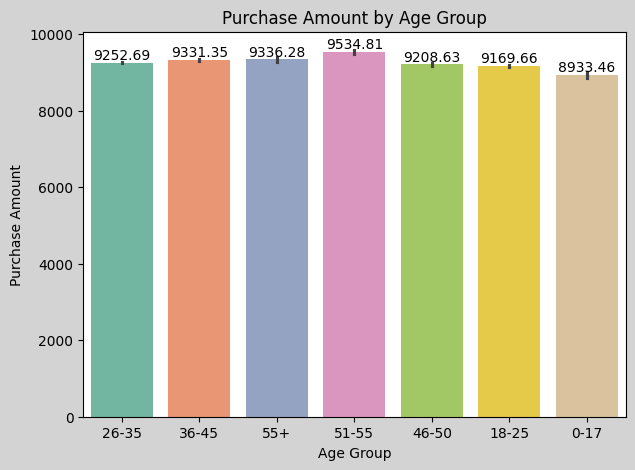

In [91]:
# Purchase Amount by Age Group
plt.figure(figsize = (7,5)).set_facecolor("lightgrey")

sorted_df = df.sort_values(by = "Purchase", ascending = False)

label = sns.barplot(x = sorted_df["Age"], y = sorted_df["Purchase"], palette = 'Set2')
plt.title("Purchase Amount by Age Group")
plt.ylabel("Purchase Amount")
plt.xlabel("Age Group")
for i in label.containers:
  label.bar_label(i)

In [96]:
df.groupby("Age")["Purchase"].describe().T

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
count,15102.000000,99660.000000,219587.000000,110013.000000,45701.000000,38501.000000,21504.000000
mean,8933.464640,9169.663606,9252.690633,9331.350695,9208.625697,9534.808031,9336.280459
std,5111.114046,5034.321997,5010.527303,5022.923879,4967.216367,5087.368080,5011.493996
min,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
25%,5328.000000,5415.000000,5475.000000,5876.000000,5888.000000,6017.000000,6018.000000
50%,7986.000000,8027.000000,8030.000000,8061.000000,8036.000000,8130.000000,8105.500000
75%,11874.000000,12028.000000,12047.000000,12107.000000,11997.000000,12462.000000,11932.000000
max,23955.000000,23958.000000,23961.000000,23960.000000,23960.000000,23960.000000,23960.000000


Insights -
* The average order value is highest for age group 51-55 which is around 9534.
* While, the average amount is lowest for age group 0-17 which is arouns 8933.
* The highest order value for all the groups is around 23960.
* The losest order value is 12 for all the groups.

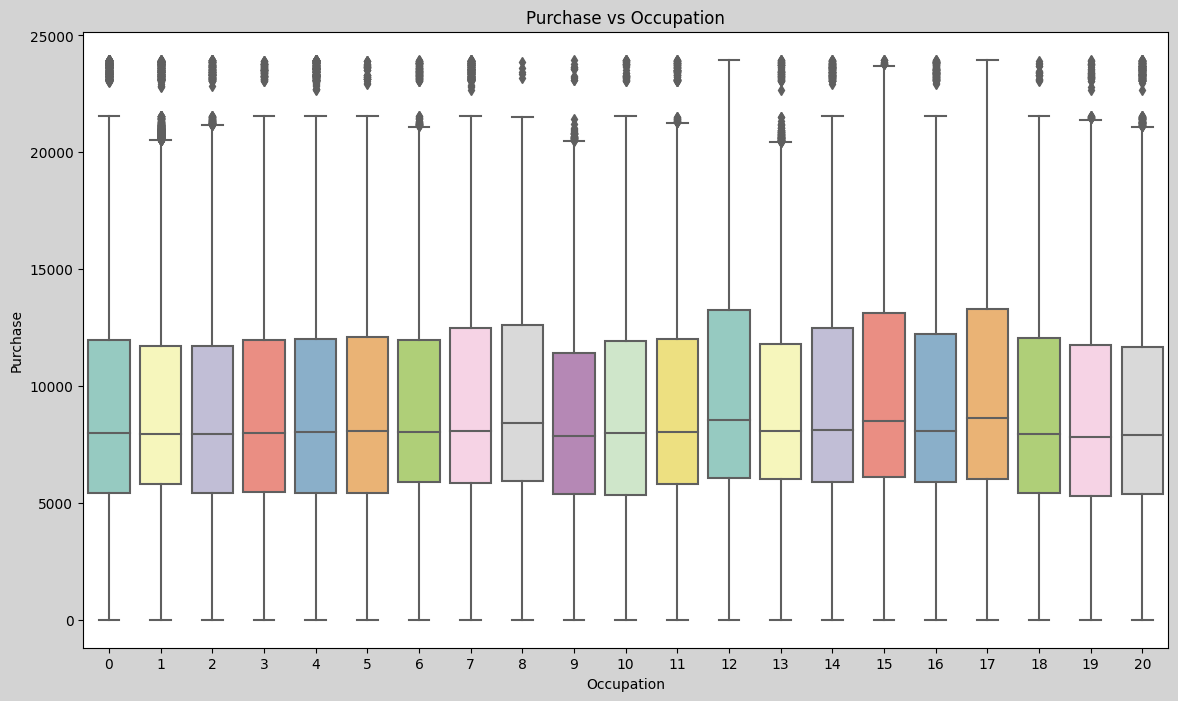

In [ ]:
# Purchase by Occupation
plt.figure(figsize = (14,8)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Occupation', palette = 'Set3')
plt.title('Purchase vs Occupation')
plt.show()

Insights -
* There are many outliers in the data.
* We can not see much difference in the median values.

In [98]:
df.groupby(['Occupation'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


Insughts -
* But, here we can observe that the highest median value is for occupation 17, which is 9821.
* The lowest median value is for occupation 19, which is 8637.

Now, lets see city wise purchase habits.

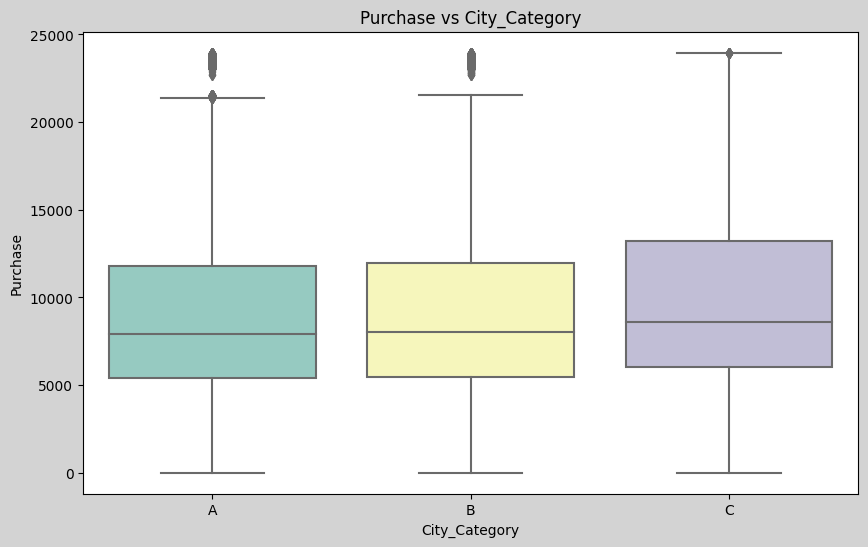

In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')
plt.title('Purchase vs City_Category')
plt.show()

Insights -
* City Category C has the highest median value followed by city B and city A.
* There are a few outliers for city A and B.

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


* We can also observe that the mean value for a order is highest for city C followed by B and A.

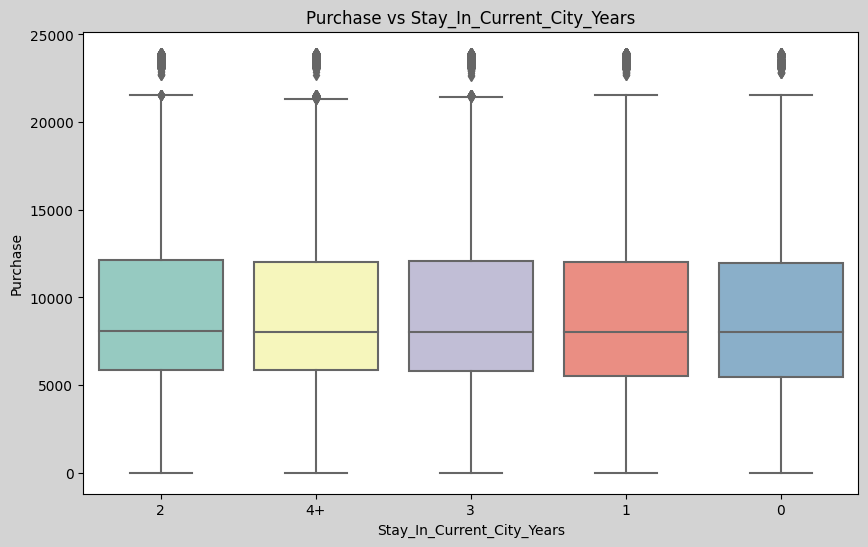

In [ ]:
# Checking if stay years of a person in a city affects his/her purchase habits or not.
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()

We can see that the median value is almost the same for all the years.

In [ ]:
df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


Insights -
* We can also see that the average order value is also almost the same which lies in the range of 9180 to 9286.
* One more thing we can observe here is that the highest order value is also the same for all the years.



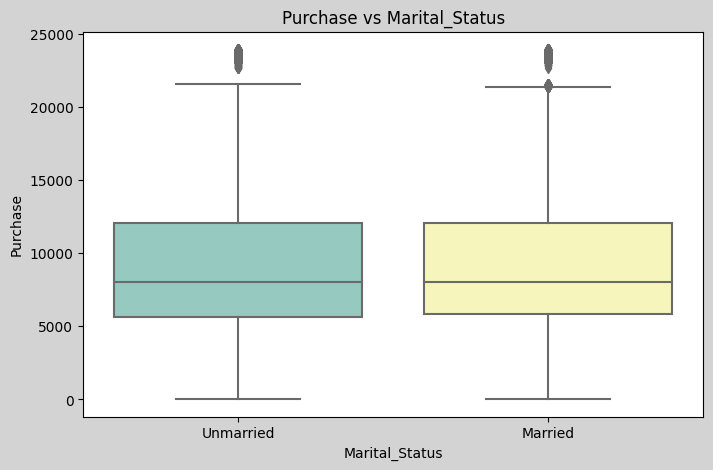

In [ ]:
# Checking if Marital Status affects the spending habits of a person
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status', palette = 'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

Insights - We can observe that the median value is almost the same.

Lets check the minimum, maximum and average order value.

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


Insights -
* The minimum and maximum order value is same for both types of people.
* We can observe that the average is also almost the same for both.

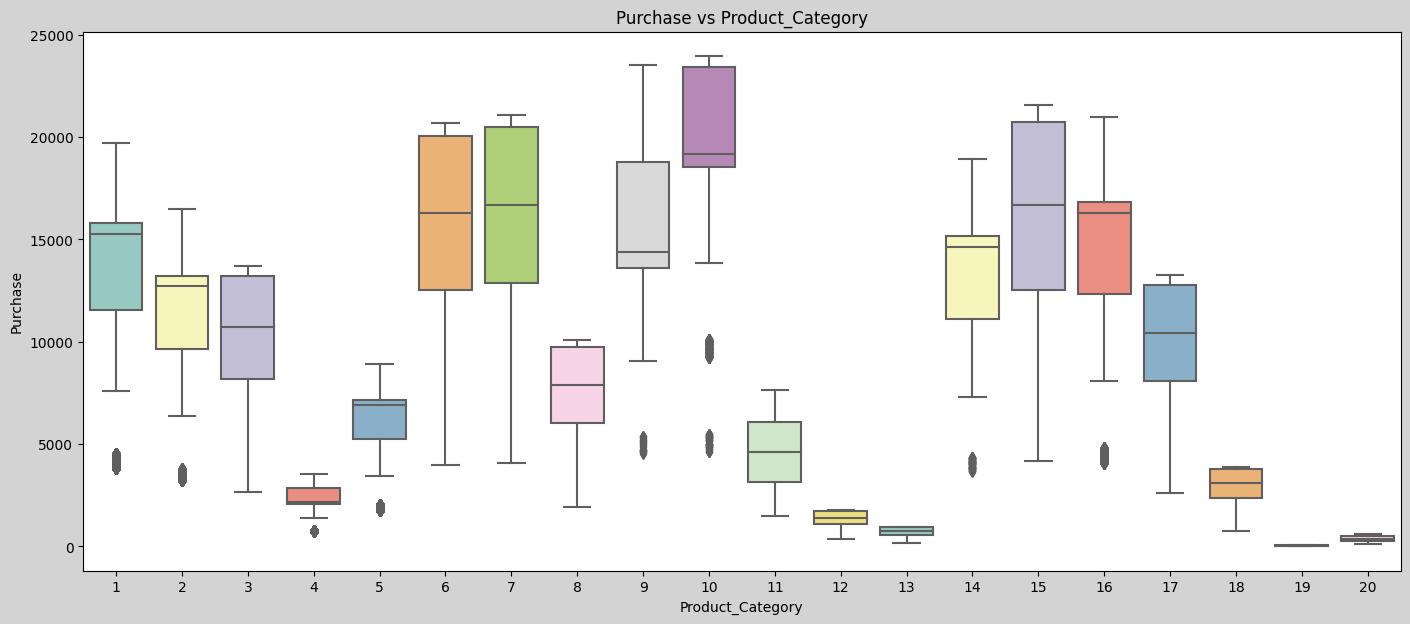

In [ ]:
# Checking which product category people spend more or less.
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

* We can clearly observe hige differences in the median values for all the product categories.

In [ ]:
df.groupby(['Product_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


Insights -
* The median value/ average value for product category 10 is the highest which is 19197.
* The median value/ average value for product category 19 is the lowest which is only 37.
* Clearly, category 19 is the least preferred or least frequent bought product category.

## Multi-variate Analysis

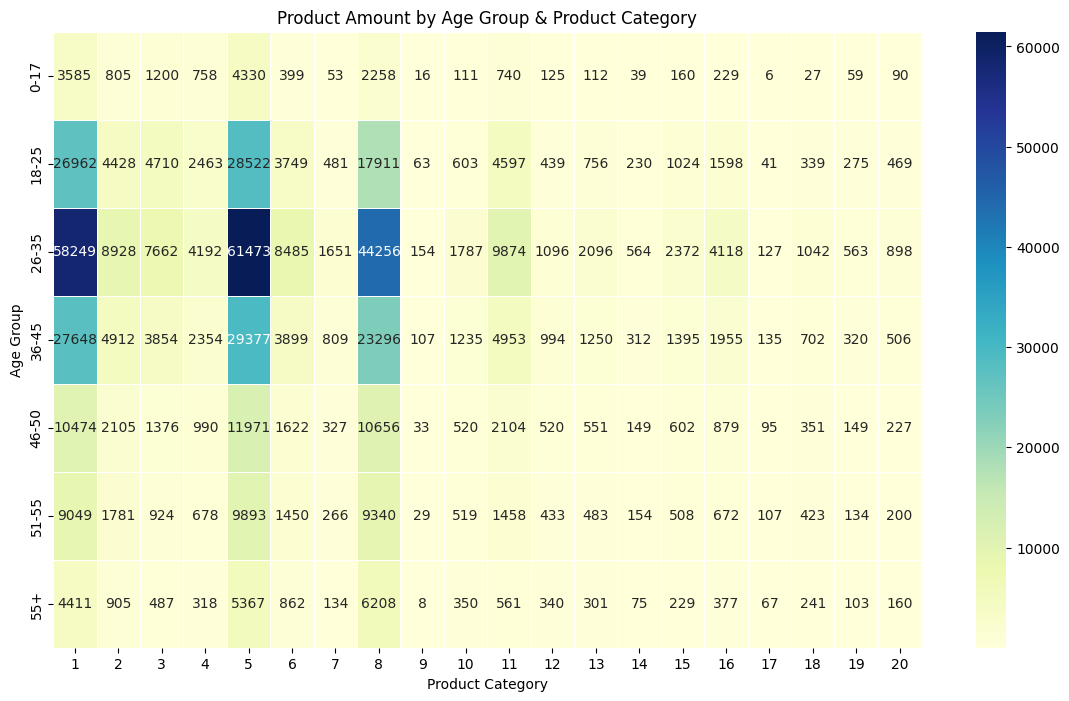

In [101]:
#Purchase amount by Age Group and Product Category
plt.figure(figsize = (14,8))
age_product_counts = df.groupby(["Age", "Product_Category"]).size().unstack()
sns.heatmap(age_product_counts, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)

plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.title('Product Amount by Age Group & Product Category')
plt.show()

Insights -
* Age Group 26-35 spend most of the amount on category 5, followed by 1 and then 8.
* Age Group 36-45 spend most of the amount on category 5, followed by 1 and then 8.
* Least Purchasing done by Age Group 0-17 for category 17, followed by category 9.

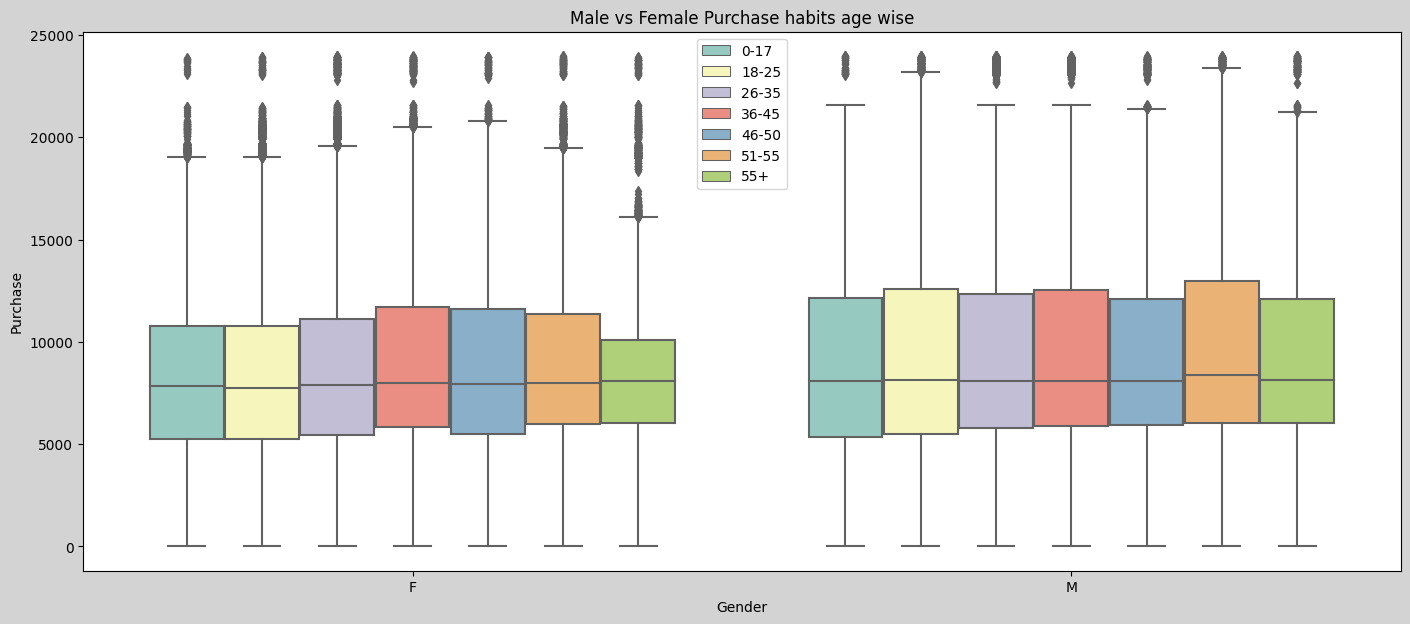

In [ ]:
# Checking Male vs Female Purchase habits age wise.
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits age wise')

plt.show()

Insights -
* The median values for 18-25 age females is the lowest and almost same for the rest.
* The median values for all age categories is almost the same and is highest for 51-55 age group.

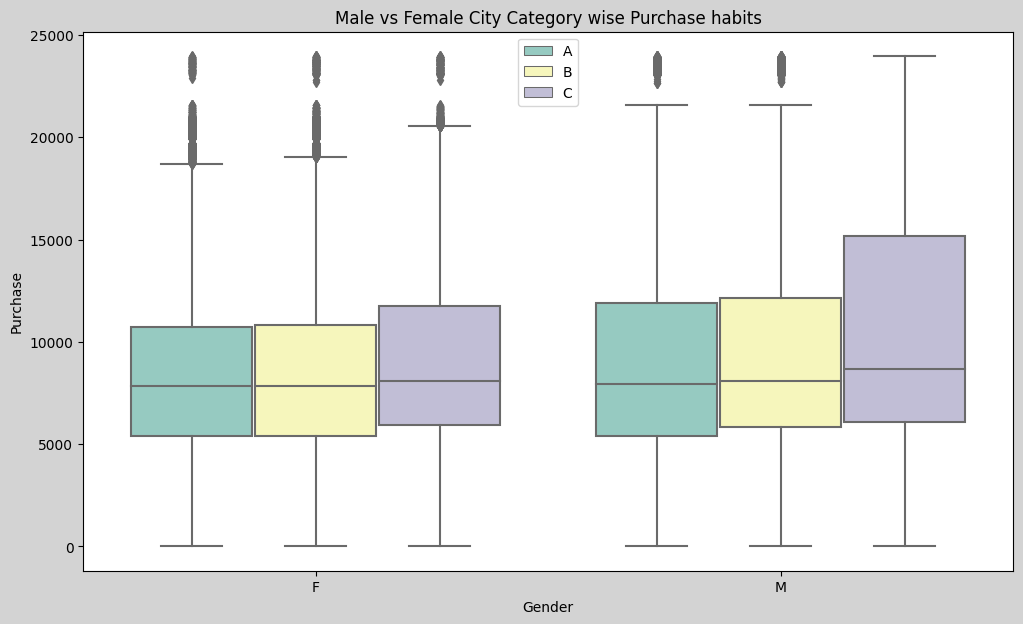

In [ ]:
# Checking Male vs Female Purchase habits age wise.
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.title("Male vs Female City Category wise Purchase habits")
plt.show()

Insights -
* The median value for females in city category C is highest compared to city A and B.
* The median value for males in city category C is also highest compared to city A and B.


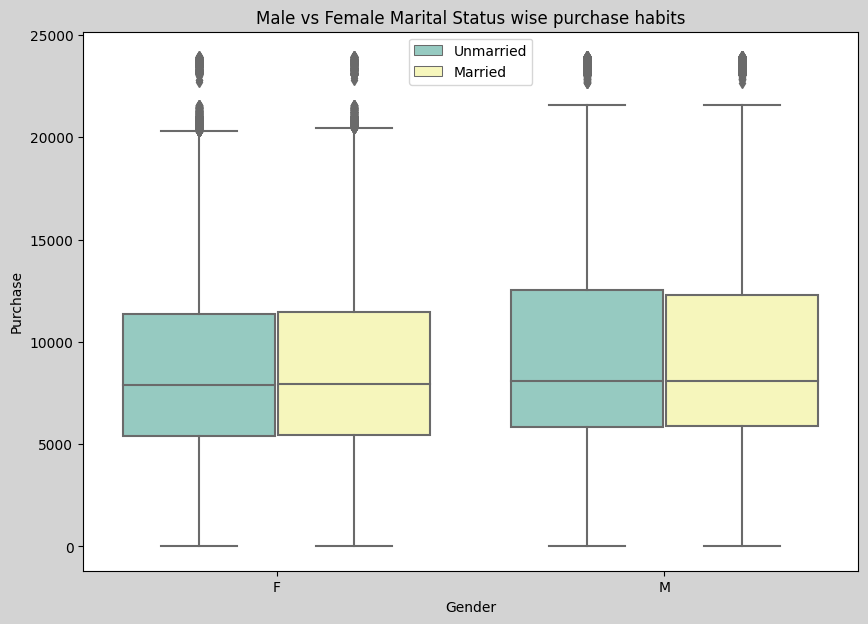

In [ ]:
# Checking Male vs Female Marital Status wise purchase habits.
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Marital Status wise purchase habits')
plt.show()

Insights -
* There is no effect of marital status on the spending habits of both the genders.
* While we can observe that the median values for Male is higher comapred to Females.

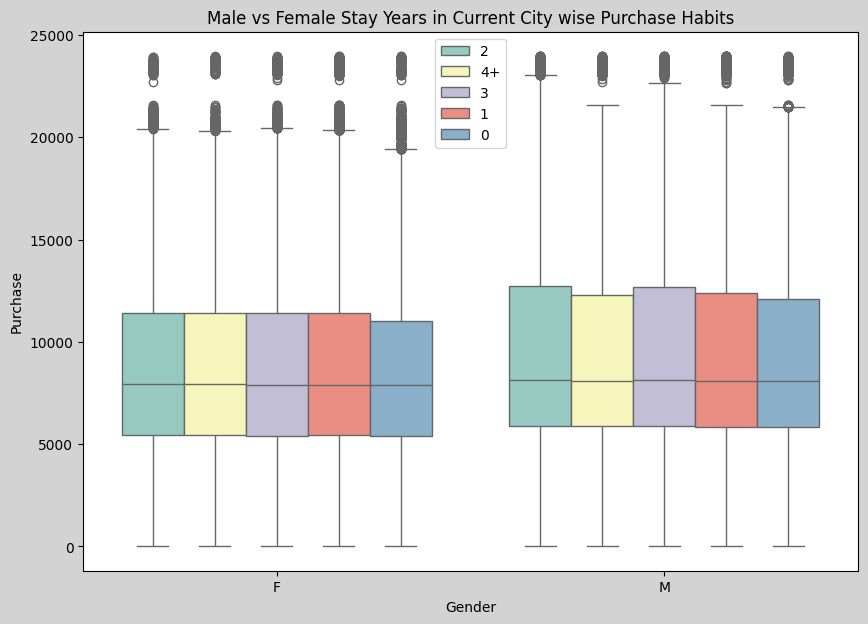

In [199]:
# Checking Male vs Female Stay Years in Current City wise Purchase Habits
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Stay Years in Current City wise Purchase Habits')
plt.show()

Insights -
* We can observe for females the median values for purchase amount is a little lower for women staying for 3 and 0 years as compared to others.
* For men, there is no much difference.

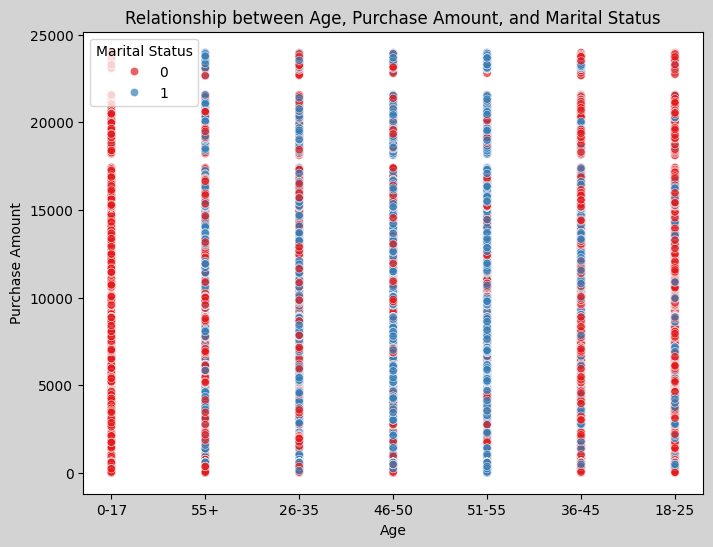

In [109]:
plt.figure(figsize=(8, 6)).set_facecolor("lightgrey")
sns.scatterplot(x="Age", y="Purchase", hue="Marital_Status", data=df, palette="Set1", alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.title('Relationship between Age, Purchase Amount, and Marital Status')

plt.legend(title="Marital Status")

plt.show()

Insights -
From above analysis we can conclude below -
- 0-17 - Only single person done all the shopping.
- 18-25 - Moslty purchasing done by single people.
- 26-35 - Ratio of purchasing by single and married is almost same.
- 36-45 - Most of the purchasing done by married people.
- 46-50 & 51-55 - Most of the purchasing done my married people.
- 55+ - Ratio of purchasing by single and married is almost same.

## Correlation in the numerical values of the dataset.

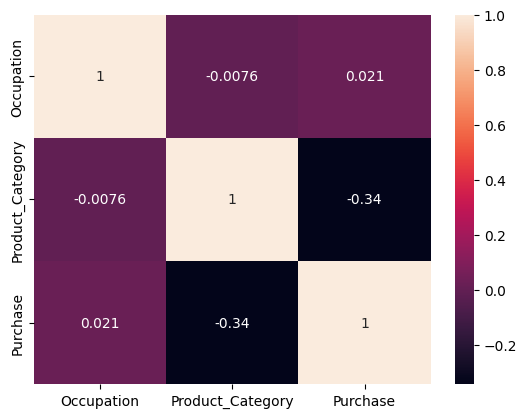

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Insights -
We can observe that there is:
* High Negative Correlation(-0.0076) between Product Category and Occupation.
* Slight Positive Correlation(0.021) between Purchase and Occupation.
* Negative Correlation(-0.34) between Product Category and Purchase.

# Central Limit Theorom


# Analysis - Gender Effect on Purchase

In [163]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [130]:
print(f"Male Purchase Mean = {df[df['Gender']=='M']['Purchase'].mean()}")
print(f"Female Purchase Mean = {df[df['Gender']=='F']['Purchase'].mean()}")

Male Purchase Mean = 9437.526040472265
Female Purchase Mean = 8734.565765155476


In [144]:
# for Sample Size = 300
male_sample_means = [df[df["Gender"]=="M"]["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
female_sample_means = [df[df["Gender"]=="F"]["Purchase"].sample(300, replace = True).mean() for i in range(1000)]

In [153]:
print(f"Male Purchase mean for sample size = 300 is: {np.mean(male_sample_means).round(2)}")
print(f"Female Purchase mean for sample size = 300 is: {np.mean(female_sample_means).round(2)}")

Male Purchase mean for sample size = 300 is: 9419.26
Female Purchase mean for sample size = 300 is: 8742.72


In [156]:
# at CI 95%
print(f"Confidence Level for Male Purchase Mean for sample size 300 is : {np.percentile(male_sample_means, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Female Purchase Mean for sample size 300 is : {np.percentile(female_sample_means, [2.5, 97.5]).round(2)}")

Confidence Level for Male Purchase Mean for sample size 300 is : [ 8820.49 10006.53]
Confidence Level for Female Purchase Mean for sample size 300 is : [8226.94 9270.33]


<Axes: ylabel='Count'>

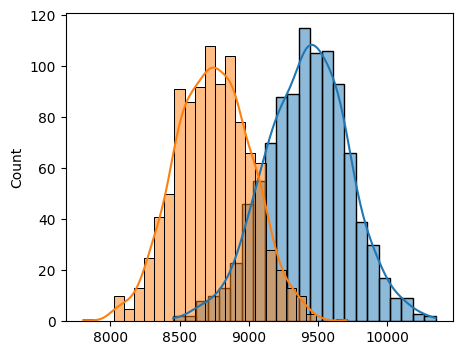

In [145]:
plt.figure(figsize = (5,4))
sns.histplot(male_sample_means, kde = True)
sns.histplot(female_sample_means, kde = True)

From the above, we are unable to conclude spending behaviour for male and female as there is overlapping . Hence will increase the sample size to 3000

In [154]:
# for Sample Size = 3000
male_sample_means1 = [df[df["Gender"]=="M"]["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
female_sample_means1 = [df[df["Gender"]=="F"]["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]

In [ ]:
print(f"Male Purchase mean for sample size = 3000 is: {np.mean(male_sample_means1).round(2)}")
print(f"Female Purchase mean for sample size = 3000 is: {np.mean(female_sample_means1).round(2)}")

In [159]:
# at CI 95%
print(f"Confidence Level for Male Purchase Mean for sample size 3000 is : {np.percentile(male_sample_means1, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Female Purchase Mean for sample size 3000 is : {np.percentile(female_sample_means1, [2.5, 97.5]).round(2)}")

Confidence Level for Male Purchase Mean for sample size 3000 is : [9252.46 9619.48]
Confidence Level for Female Purchase Mean for sample size 3000 is : [8577.68 8906.76]


<Axes: ylabel='Count'>

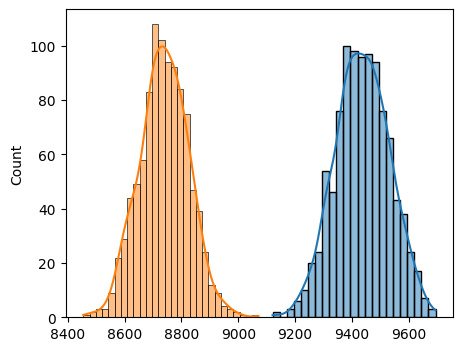

In [158]:
plt.figure(figsize = (5,4))
sns.histplot(male_sample_means1, kde = True)
sns.histplot(female_sample_means1, kde = True)

Insight -
* Performed CI with sample size of 300 for 1000 iterations at 95% confidence interval, there was overlap of levels in both male and female - hence unable to conclude the speanding behaviour of male & female.
* Increased sample size to 3000 for 1000 iterations at 95% CI, there was no overlap, so we were able to conclude that mean spending of male is more than the female.
* With 95% Confidence interval we can say that Male mean will lie between [9252 , 9619] and Female mean will lie between [8577, 8906].
* Increasing the sample size,decreases the standard error.
* Shape of distribution is more likely normal distribution when the sample size is bigger.

# Analysis - Marital Status Effect on Purchase

In [164]:
df.groupby("Marital_Status")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [165]:
print(f"Single Person Purchase Mean = {df[df['Marital_Status']==0]['Purchase'].mean().round(2)}")
print(f"Married Person Purchase Mean = {df[df['Marital_Status']==1]['Purchase'].mean().round(2)}")

Single Person Purchase Mean = 9265.91
Married Person Purchase Mean = 9261.17


In [166]:
# for Sample Size = 300
single_sample_means = [df[df["Marital_Status"]==0]["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
married_sample_means = [df[df["Marital_Status"]==1]["Purchase"].sample(300, replace = True).mean() for i in range(1000)]

In [169]:
print(f"Single Person Purchase mean for sample size = 300 is: {np.mean(single_sample_means).round(2)}")
print(f"Married Person Purchase mean for sample size = 300 is: {np.mean(married_sample_means).round(2)}")

Single Person Purchase mean for sample size = 300 is: 9275.19
Married Person Purchase mean for sample size = 300 is: 9263.07


In [172]:
# at CI 95%
print(f"Confidence Level for Single Person Purchase Mean for sample size 300 is : {np.percentile(single_sample_means, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Married Person Purchase Mean for sample size 300 is : {np.percentile(married_sample_means, [2.5, 97.5]).round(2)}")

Confidence Level for Single Person Purchase Mean for sample size 300 is : [8729.56 9831.93]
Confidence Level for Married Person Purchase Mean for sample size 300 is : [8674.1  9837.12]


<Axes: ylabel='Count'>

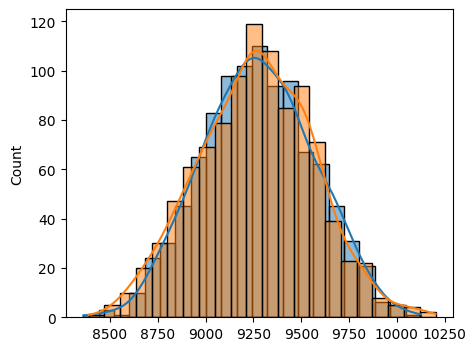

In [168]:
plt.figure(figsize = (5,4))
sns.histplot(single_sample_means, kde = True)
sns.histplot(married_sample_means, kde = True)

From the above, we are unable to conclude spending behaviour for Single and Married as data is overlapping . Hence will increase the sample size to 3000

In [173]:
# for Sample Size = 3000
single_sample_means1 = [df[df["Marital_Status"]==0]["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
married_sample_means1 = [df[df["Marital_Status"]==1]["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]

In [178]:
print(f"Single Person Purchase mean for sample size = 3000 is: {np.mean(single_sample_means1).round(2)}")
print(f"Married Person Purchase mean for sample size = 3000 is: {np.mean(married_sample_means1).round(2)}")

Single Person Purchase mean for sample size = 3000 is: 9265.85
Married Person Purchase mean for sample size = 3000 is: 9265.58


In [177]:
# at CI 95%
print(f"Confidence Level for Single Person Purchase Mean for sample size 3000 is : {np.percentile(single_sample_means1, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Married Person Purchase Mean for sample size 3000 is : {np.percentile(married_sample_means1, [2.5, 97.5]).round(2)}")

Confidence Level for Single Person Purchase Mean for sample size 3000 is : [9093.23 9442.66]
Confidence Level for Married Person Purchase Mean for sample size 3000 is : [9081.01 9439.44]


<Axes: ylabel='Count'>

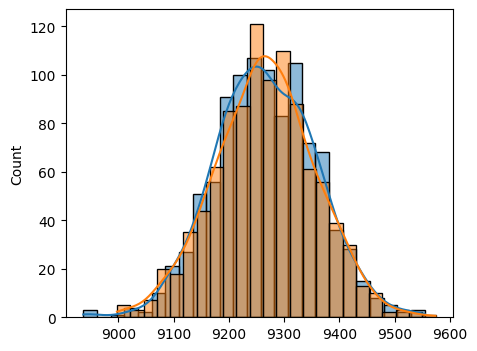

In [174]:
plt.figure(figsize = (5,4))
sns.histplot(single_sample_means1, kde = True)
sns.histplot(married_sample_means1, kde = True)

Still we are unable to conclude spending behaviour for Single and Married as data is overlapping . Hence will increase the sample size to 30000

In [179]:
# for Sample Size = 30000
single_sample_means2 = [df[df["Marital_Status"]==0]["Purchase"].sample(30000, replace = True).mean() for i in range(1000)]
married_sample_means2 = [df[df["Marital_Status"]==1]["Purchase"].sample(30000, replace = True).mean() for i in range(1000)]

In [181]:
print(f"Single Person Purchase mean for sample size = 30000 is: {np.mean(single_sample_means1).round(2)}")
print(f"Married Person Purchase mean for sample size = 30000 is: {np.mean(married_sample_means1).round(2)}")

Single Person Purchase mean for sample size = 30000 is: 9265.85
Married Person Purchase mean for sample size = 30000 is: 9265.58


In [182]:
# at CI 95%
print(f"Confidence Level for Single Person Purchase Mean for sample size 30000 is : {np.percentile(single_sample_means1, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Married Person Purchase Mean for sample size 30000 is : {np.percentile(married_sample_means1, [2.5, 97.5]).round(2)}")

Confidence Level for Single Person Purchase Mean for sample size 30000 is : [9093.23 9442.66]
Confidence Level for Married Person Purchase Mean for sample size 30000 is : [9081.01 9439.44]


<Axes: ylabel='Count'>

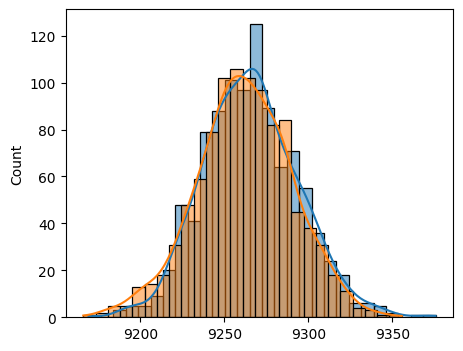

In [180]:
plt.figure(figsize = (5,4))
sns.histplot(single_sample_means2, kde = True)
sns.histplot(married_sample_means2, kde = True)

Insights -
We can't conclude that if married person or single person spend more as the data is overlapping even for increasing sample size upto 30000.
So we can say that the purchasing behaviour is same for Single and Married person.

# Analysis - Age Group Effect on Purchase

In [183]:
df.groupby("Age")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [187]:
print(f"0-17 Age Group Purchase Mean = {df[df['Age']=='0-17']['Purchase'].mean().round(2)}")
print(f"18-25 Age Group Purchase Mean = {df[df['Age']=='18-25']['Purchase'].mean().round(2)}")
print(f"26-35 Age Group Purchase Mean = {df[df['Age']=='26-35']['Purchase'].mean().round(2)}")
print(f"36-45 Age Group Purchase Mean = {df[df['Age']=='36-45']['Purchase'].mean().round(2)}")
print(f"46-50 Age Group Purchase Mean = {df[df['Age']=='46-50']['Purchase'].mean().round(2)}")
print(f"51-55 Age Group Purchase Mean = {df[df['Age']=='51-55']['Purchase'].mean().round(2)}")
print(f"55+ Age Group Purchase Mean = {df[df['Age']=='55+']['Purchase'].mean().round(2)}")

0-17 Age Group Purchase Mean = 8933.46
18-25 Age Group Purchase Mean = 9169.66
26-35 Age Group Purchase Mean = 9252.69
36-45 Age Group Purchase Mean = 9331.35
46-50 Age Group Purchase Mean = 9208.63
51-55 Age Group Purchase Mean = 9534.81
55+ Age Group Purchase Mean = 9336.28


In [189]:
# for Sample Size = 300
sample_means_1 = [df[df["Age"]=='0-17']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
sample_means_2 = [df[df["Age"]=='18-25']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
sample_means_3 = [df[df["Age"]=='26-35']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
sample_means_4 = [df[df["Age"]=='36-45']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
sample_means_5 = [df[df["Age"]=='46-50']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
sample_means_6 = [df[df["Age"]=='51-55']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]
sample_means_7 = [df[df["Age"]=='55+']["Purchase"].sample(300, replace = True).mean() for i in range(1000)]

In [193]:
print(f"Mean for Age 0-17 for sample size = 300 is: {np.mean(sample_means_1).round(2)}")
print(f"Mean for Age 18-25 for sample size = 300 is: {np.mean(sample_means_2).round(2)}")
print(f"Mean for Age 26-35 for sample size = 300 is: {np.mean(sample_means_3).round(2)}")
print(f"Mean for Age 36-45 for sample size = 300 is: {np.mean(sample_means_4).round(2)}")
print(f"Mean for Age 46-50 for sample size = 300 is: {np.mean(sample_means_5).round(2)}")
print(f"Mean for Age 51-55 for sample size = 300 is: {np.mean(sample_means_6).round(2)}")
print(f"Mean for Age 55+ for sample size = 300 is: {np.mean(sample_means_7).round(2)}")

Mean for Age 0-17 for sample size = 300 is: 8922.45
Mean for Age 18-25 for sample size = 300 is: 9173.28
Mean for Age 26-35 for sample size = 300 is: 9268.49
Mean for Age 36-45 for sample size = 300 is: 9331.59
Mean for Age 46-50 for sample size = 300 is: 9216.54
Mean for Age 51-55 for sample size = 300 is: 9526.46
Mean for Age 55+ for sample size = 300 is: 9332.19


In [191]:
# at CI 95%
print(f"Confidence Level for Mean of Age Group 1 for sample size 300 is : {np.percentile(sample_means_1, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 2 for sample size 300 is : {np.percentile(sample_means_2, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 3 for sample size 300 is : {np.percentile(sample_means_3, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 4 for sample size 300 is : {np.percentile(sample_means_4, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 5 for sample size 300 is : {np.percentile(sample_means_5, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 6 for sample size 300 is : {np.percentile(sample_means_6, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 7 for sample size 300 is : {np.percentile(sample_means_7, [2.5, 97.5]).round(2)}")

Confidence Level for Mean of Age Group 1 for sample size 300 is : [8348.82 9482.68]
Confidence Level for Mean of Age Group 2 for sample size 300 is : [8646.88 9741.77]
Confidence Level for Mean of Age Group 3 for sample size 300 is : [8680.73 9826.1 ]
Confidence Level for Mean of Age Group 4 for sample size 300 is : [8780.18 9905.7 ]
Confidence Level for Mean of Age Group 5 for sample size 300 is : [8669.2  9782.71]
Confidence Level for Mean of Age Group 6 for sample size 300 is : [ 8961.   10140.39]
Confidence Level for Mean of Age Group 7 for sample size 300 is : [8779.7  9890.37]


<Axes: ylabel='Count'>

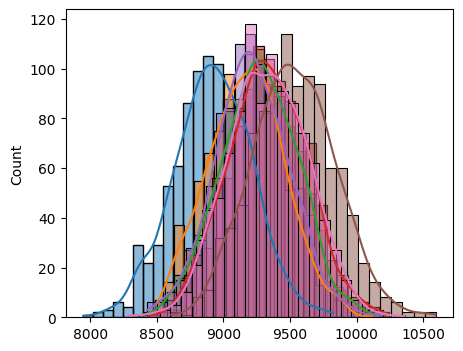

In [192]:
plt.figure(figsize = (5,4))
sns.histplot(sample_means_1, kde = True)
sns.histplot(sample_means_2, kde = True)
sns.histplot(sample_means_3, kde = True)
sns.histplot(sample_means_4, kde = True)
sns.histplot(sample_means_5, kde = True)
sns.histplot(sample_means_6, kde = True)
sns.histplot(sample_means_7, kde = True)


Here, we can't say that which Age Group is spending more and which is less , as the data is overlapping.

Lets increase the sample size for 30000

In [194]:
# for Sample Size = 3000
sample_means1_1 = [df[df["Age"]=='0-17']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
sample_means1_2 = [df[df["Age"]=='18-25']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
sample_means1_3 = [df[df["Age"]=='26-35']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
sample_means1_4 = [df[df["Age"]=='36-45']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
sample_means1_5 = [df[df["Age"]=='46-50']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
sample_means1_6 = [df[df["Age"]=='51-55']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]
sample_means1_7 = [df[df["Age"]=='55+']["Purchase"].sample(3000, replace = True).mean() for i in range(1000)]

In [195]:
print(f"Mean for Age 0-17 for sample size = 300 is: {np.mean(sample_means1_1).round(2)}")
print(f"Mean for Age 18-25 for sample size = 300 is: {np.mean(sample_means1_2).round(2)}")
print(f"Mean for Age 26-35 for sample size = 300 is: {np.mean(sample_means1_3).round(2)}")
print(f"Mean for Age 36-45 for sample size = 300 is: {np.mean(sample_means1_4).round(2)}")
print(f"Mean for Age 46-50 for sample size = 300 is: {np.mean(sample_means1_5).round(2)}")
print(f"Mean for Age 51-55 for sample size = 300 is: {np.mean(sample_means1_6).round(2)}")
print(f"Mean for Age 55+ for sample size = 300 is: {np.mean(sample_means1_7).round(2)}")

Mean for Age 0-17 for sample size = 300 is: 8931.91
Mean for Age 18-25 for sample size = 300 is: 9172.09
Mean for Age 26-35 for sample size = 300 is: 9254.96
Mean for Age 36-45 for sample size = 300 is: 9328.15
Mean for Age 46-50 for sample size = 300 is: 9207.09
Mean for Age 51-55 for sample size = 300 is: 9536.41
Mean for Age 55+ for sample size = 300 is: 9331.24


In [196]:
# at CI 95%
print(f"Confidence Level for Mean of Age Group 1 for sample size 300 is : {np.percentile(sample_means1_1, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 2 for sample size 300 is : {np.percentile(sample_means1_2, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 3 for sample size 300 is : {np.percentile(sample_means1_3, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 4 for sample size 300 is : {np.percentile(sample_means1_4, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 5 for sample size 300 is : {np.percentile(sample_means1_5, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 6 for sample size 300 is : {np.percentile(sample_means1_6, [2.5, 97.5]).round(2)}")
print(f"Confidence Level for Mean of Age Group 7 for sample size 300 is : {np.percentile(sample_means1_7, [2.5, 97.5]).round(2)}")

Confidence Level for Mean of Age Group 1 for sample size 300 is : [8748.18 9107.52]
Confidence Level for Mean of Age Group 2 for sample size 300 is : [8994.01 9358.94]
Confidence Level for Mean of Age Group 3 for sample size 300 is : [9084.63 9418.67]
Confidence Level for Mean of Age Group 4 for sample size 300 is : [9151.38 9500.4 ]
Confidence Level for Mean of Age Group 5 for sample size 300 is : [9031.5  9384.13]
Confidence Level for Mean of Age Group 6 for sample size 300 is : [9357.68 9709.83]
Confidence Level for Mean of Age Group 7 for sample size 300 is : [9154.06 9513.35]


<Axes: ylabel='Count'>

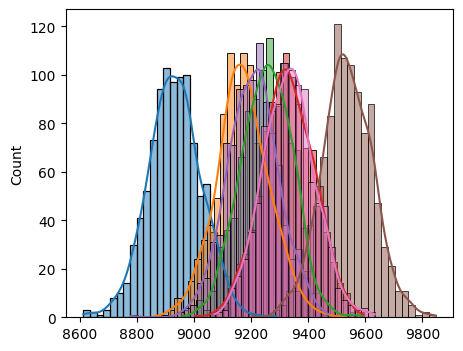

In [197]:
plt.figure(figsize = (5,4))
sns.histplot(sample_means1_1, kde = True)
sns.histplot(sample_means1_2, kde = True)
sns.histplot(sample_means1_3, kde = True)
sns.histplot(sample_means1_4, kde = True)
sns.histplot(sample_means1_5, kde = True)
sns.histplot(sample_means1_6, kde = True)
sns.histplot(sample_means1_7, kde = True)

Insights -
* Increased sample size to 30000 for 1000 iterations at 95% CI - not all age groups have overlap.
* We can say with 95% confidence level that the age group 51-55 spends the most and (0-17) the least.
* Between 18-50 Years the spending habit is almost the same.
* Hence, we can say that age group does not have much effect on the spendings.

### Inferences



* 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

* 75% of the users are Male and 25% are Female. Males clearly purchase more than females.

* 59% Single, 41% Married

* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

* The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

* The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City  Category B.

* Majority of Customers purchase within the 5,000 - 20,000 range.

* Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

* City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

* Most mall customers are between the ages of 26 and 35. City category C has more customers between the ages of 18 and 45.

* In City Category C, there are slightly more female customers.

* Product 5 and 8 is common among females.

### Recommendations

* Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on * selling more of these products or selling more of the products which are purchased less.

* Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

* Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.

* Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

* In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women  can increase their spending on Black Friday.

* Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

* The management should have some offers on kids (0-17 years) in order to increase sales.

* In order to attract more young shoppers, they can offer some games etc. for the younger generation.